<a href="https://colab.research.google.com/github/Sushmitha-Katti/ERA/blob/main/Session%207%20-%20In-Depth%20Coding%20Practice/Drill4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [74]:
# To reload the disk files
%load_ext autoreload
%autoreload 2

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
# Train Phase transformations
train_transforms = transforms.Compose([

                                        transforms.RandomRotation((-7.0, 7.0), fill=(1,)),

                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [81]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

# Dataloader Arguments & Test/Train Dataloaders


In [82]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


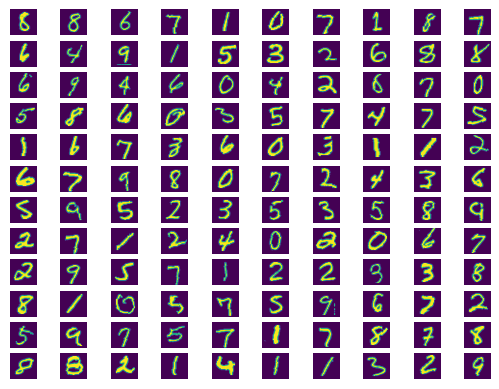

In [83]:
from utils import plot_images
dataiter = iter(train_loader)
images, labels = next(dataiter)
plot_images(120, images)

# Model Params


In [89]:
from models.model4 import Model4
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model4().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 26, 26]             108
              ReLU-2           [-1, 12, 26, 26]               0
       BatchNorm2d-3           [-1, 12, 26, 26]              24
         Dropout2d-4           [-1, 12, 26, 26]               0
            Conv2d-5           [-1, 12, 24, 24]           1,296
              ReLU-6           [-1, 12, 24, 24]               0
       BatchNorm2d-7           [-1, 12, 24, 24]              24
         Dropout2d-8           [-1, 12, 24, 24]               0
         MaxPool2d-9           [-1, 12, 12, 12]               0
           Conv2d-10           [-1, 14, 10, 10]           1,512
             ReLU-11           [-1, 14, 10, 10]               0
      BatchNorm2d-12           [-1, 14, 10, 10]              28

# Model Training and Testing

In [90]:

from train_test import TrainTest
train_test_instance = TrainTest()

model =  Model4().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    train_test_instance.train(model, device, train_loader, optimizer, epoch)
    train_test_instance.test(model, device, test_loader)

EPOCH: 1


Loss=0.08469726890325546 Batch_id=468 Accuracy=85.89: 100%|██████████| 469/469 [00:27<00:00, 17.09it/s]



Test set: Average loss: 0.0713, Accuracy: 9818/10000 (98.18%)

EPOCH: 2


Loss=0.04399832710623741 Batch_id=468 Accuracy=97.09: 100%|██████████| 469/469 [00:20<00:00, 22.40it/s]



Test set: Average loss: 0.0381, Accuracy: 9888/10000 (98.88%)

EPOCH: 3


Loss=0.043653082102537155 Batch_id=468 Accuracy=97.83: 100%|██████████| 469/469 [00:21<00:00, 21.32it/s]



Test set: Average loss: 0.0330, Accuracy: 9906/10000 (99.06%)

EPOCH: 4


Loss=0.011258403770625591 Batch_id=468 Accuracy=98.06: 100%|██████████| 469/469 [00:23<00:00, 19.97it/s]



Test set: Average loss: 0.0280, Accuracy: 9910/10000 (99.10%)

EPOCH: 5


Loss=0.08516508340835571 Batch_id=468 Accuracy=98.30: 100%|██████████| 469/469 [00:22<00:00, 20.84it/s]



Test set: Average loss: 0.0259, Accuracy: 9919/10000 (99.19%)

EPOCH: 6


Loss=0.02086581476032734 Batch_id=468 Accuracy=98.43: 100%|██████████| 469/469 [00:22<00:00, 20.85it/s]



Test set: Average loss: 0.0236, Accuracy: 9926/10000 (99.26%)

EPOCH: 7


Loss=0.05745100975036621 Batch_id=468 Accuracy=98.51: 100%|██████████| 469/469 [00:21<00:00, 21.61it/s]



Test set: Average loss: 0.0244, Accuracy: 9923/10000 (99.23%)

EPOCH: 8


Loss=0.0596756786108017 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:21<00:00, 21.51it/s]



Test set: Average loss: 0.0219, Accuracy: 9924/10000 (99.24%)

EPOCH: 9


Loss=0.060209017246961594 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:22<00:00, 21.15it/s]



Test set: Average loss: 0.0221, Accuracy: 9931/10000 (99.31%)

EPOCH: 10


Loss=0.05311502888798714 Batch_id=468 Accuracy=98.65: 100%|██████████| 469/469 [00:23<00:00, 20.30it/s]



Test set: Average loss: 0.0213, Accuracy: 9936/10000 (99.36%)

EPOCH: 11


Loss=0.03704952821135521 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:23<00:00, 20.10it/s]



Test set: Average loss: 0.0222, Accuracy: 9928/10000 (99.28%)

EPOCH: 12


Loss=0.013199354521930218 Batch_id=468 Accuracy=98.73: 100%|██████████| 469/469 [00:23<00:00, 20.19it/s]



Test set: Average loss: 0.0202, Accuracy: 9930/10000 (99.30%)

EPOCH: 13


Loss=0.03017021156847477 Batch_id=468 Accuracy=98.81: 100%|██████████| 469/469 [00:22<00:00, 20.98it/s]



Test set: Average loss: 0.0186, Accuracy: 9940/10000 (99.40%)

EPOCH: 14


Loss=0.08152234554290771 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:20<00:00, 22.36it/s]



Test set: Average loss: 0.0197, Accuracy: 9936/10000 (99.36%)

EPOCH: 15


Loss=0.02387903816998005 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:22<00:00, 20.49it/s]



Test set: Average loss: 0.0209, Accuracy: 9928/10000 (99.28%)



# Loss and Accuaracy

Text(0.5, 1.0, 'Test Accuracy')

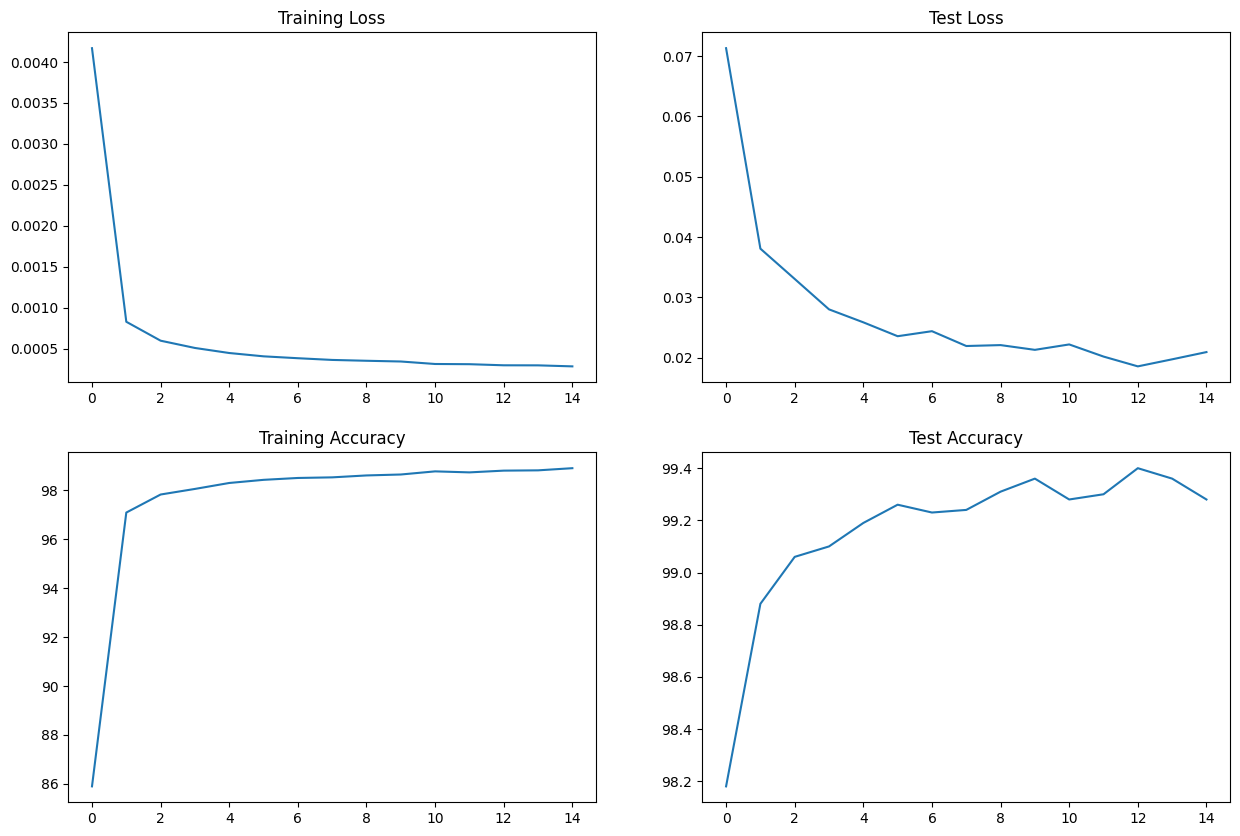

In [91]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_test_instance.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_test_instance.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(train_test_instance.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(train_test_instance.test_acc)
axs[1, 1].set_title("Test Accuracy")